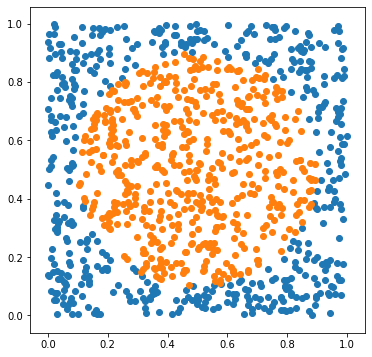

In [1]:
import torch
import math
import matplotlib.pyplot as plt

import Modules
import Sequential
import Optimizer
from helpers import plot_data

def generate_disc_set(nb_sample):
    
    data = torch.empty(nb_sample, 2).uniform_(0, 1)
    labels = data.sub(0.5).pow(2).sum(1).sub(1/(2*math.pi)).sign().add(1).div(2).long()
    
    plot_data(data, labels)

    return data, labels

data, target = generate_disc_set(1000)

In [2]:
m = Modules.Linear(2,20)
op = m(data)
print(op.size())

b = Modules.ReLu()
print(b(op).size())

torch.Size([1000, 20])
torch.Size([1000, 20])


torch.Size([1000])


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'mat2' in call to _th_mm

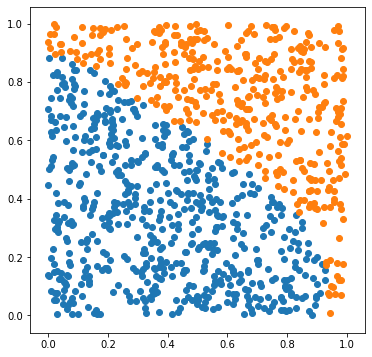

In [6]:
# Train :

nb_epochs = 25
losses = []

# Modules sequence
m1 = Modules.Linear(2,25)
m2 = Modules.Linear(25,25)
m3 = Modules.Linear(25,2)
relu = Modules.ReLu()
sequence = Modules.Sequential(m1, relu, m2, relu, m3, relu)

# loss criterion
MSE = Modules.MSE()

# Optimizer
sgd = Optimizer.SGD(sequence.param())

# train
for e in range(1):
    output = sequence(data)
    predicted_classes = output.max(1)[1]
    plot_data(data, predicted_classes)
    loss = MSE(output,target)
    
    dl_dx = MSE.backward(predicted_classes,target)
    
    print(dl_dx.size())
    
    sequence.backward(dl_dx)
    
    sgd.step()